# Statistical Learning Assignment
Learning Outcomes:
 Exploratory Data Analysis
 Practicing statistics using Python
 Hypothesis testing

# 1: Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
sns.set(color_codes=True)

# 2: Read the data as a data frame

In [2]:
pdata = pd.read_csv("insurance.csv")

In [3]:
pdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3.a Shape of the data

In [4]:
#Shape of data
pdata.shape

(1338, 7)

# 3b: Data type of each attribute

In [5]:
#Data type of each attribute
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
pdata.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# sex, smoker and region are categorical features they are objects

# 3c: Checking the presence of missing values

In [8]:
#Checking the presence of missing values
pdata.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
pdata.isnull().values.any()

False

# 3d: 5 point summary of numerical attributes

In [10]:
#Five point summary of data
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [11]:
# More than 50% of person are having BMI of 30.4 or more, average age is 39 years.

# 3e: Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

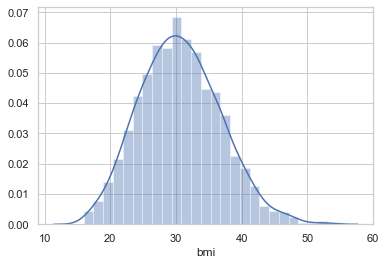

In [12]:
sns.set(style="whitegrid", color_codes=True)
#Distribution of bmi
sns.distplot(pdata["bmi"])

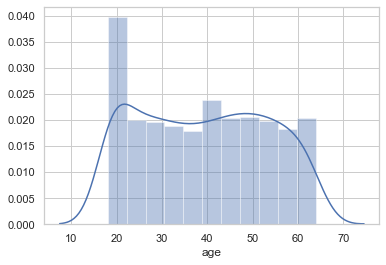

In [13]:
# Distribution of age
sns.distplot(pdata["age"])

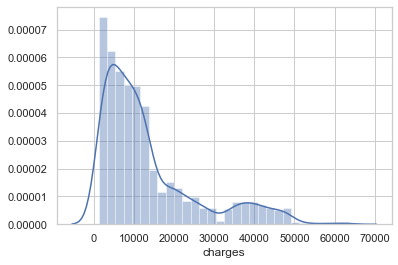

In [14]:
# Distribution of charges
sns.distplot(pdata["charges"])

# 3f: Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [15]:
# skewness for bmi
print("skewness for bmi {}".format(pdata["bmi"].skew()))

skewness for bmi 0.2840471105987448


In [16]:
# skewness for age
print("skewness for age {}".format(pdata["age"].skew()))

skewness for age 0.05567251565299186


In [17]:
# skewness for charges
print("skewness for charges {}".format(pdata["charges"].skew()))

skewness for charges 1.5158796580240388


In [18]:
data = {"Skewness":[pdata["bmi"].skew(), pdata["age"].skew(), pdata["charges"].skew()]}
pd.DataFrame(data, index=["bmi", "age","charges"])

# bmi, age and charges, the skewness is positive i.e. Right skewed 

,Skewness
bmi,0.284047
age,0.055673
charges,1.515880


# 3g: Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

In [19]:
#outliers means data points > Q3 + 1.5 * (Q3 - Q1) 
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [20]:
pdata.describe().T.loc[["bmi"],["25%","75%"]]

,25%,75%
bmi,26.29625,34.69375


In [21]:
#data points > Q3 + 1.5 * (Q3 - Q1)
bmi_outlier_cutoff = 34.693750 + 1.5 * (34.693750 - 26.29625)
bmi_outlier_cutoff
pdata[pdata['bmi']>bmi_outlier_cutoff]["bmi"].count()

9

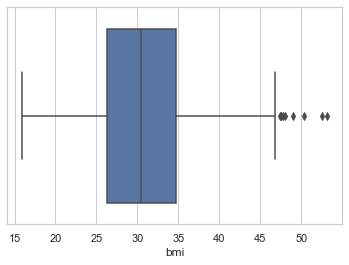

In [22]:
#Check presence of outliers for bmi
sns.boxplot(pdata['bmi'])

In [23]:
pdata.describe().T.loc[["age"],["25%","75%"]]

,25%,75%
age,27.0,51.0


In [24]:
#data points > Q3 + 1.5 * (Q3 - Q1)
age_outlier_cutoff = 51 + 1.5 * (51 - 27)
age_outlier_cutoff
pdata[pdata['age']>age_outlier_cutoff]["age"].count()

0

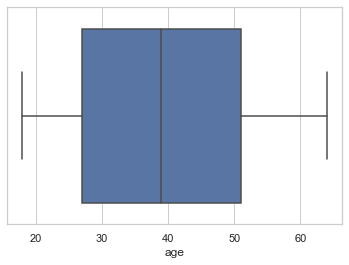

In [25]:
#Check presence of outliers for age
sns.boxplot(pdata['age'])

In [26]:
pdata.describe().T.loc[["charges"],["25%","75%"]]

,25%,75%
charges,4740.28715,16639.912515


In [27]:
#data points > Q3 + 1.5 * (Q3 - Q1)
charges_outlier_cutoff = 16639.912515 + 1.5 * (16639.912515 - 4740.28715)
charges_outlier_cutoff
pdata[pdata['charges']>age_outlier_cutoff]["charges"].count()

1338

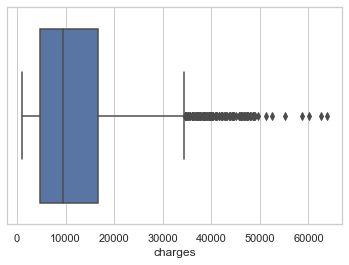

In [28]:
#Check presence of outliers for charges
sns.boxplot(pdata['charges'])

# 3h: Distribution of categorical columns (include children)

In [29]:
#Distribution of categorical data (sex, children, smoker and region)
pdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


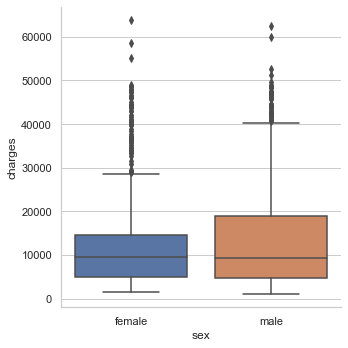

In [30]:
#Box plot to categorical value sex with respect to charges
sns.catplot(x="sex", y="charges", kind="box", data=pdata)

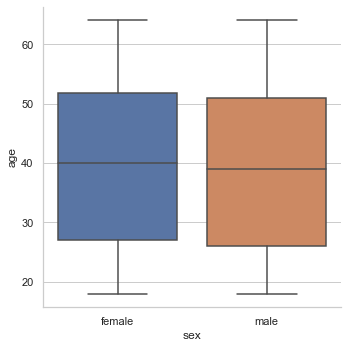

In [31]:
#Box plot to categorical value sex with respect to age
sns.catplot(x="sex", y="age", kind="box", data=pdata)

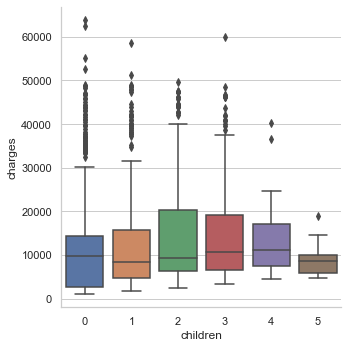

In [32]:
#Box plot to categorical value children with respect to charges
sns.catplot(x="children", y="charges", kind="box", data=pdata)

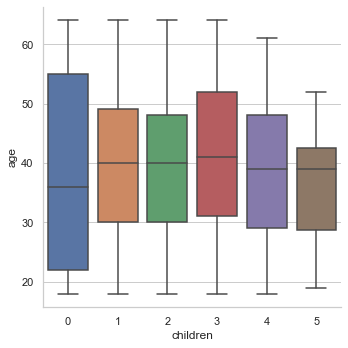

In [33]:
#Box plot to categorical value children with respect to age
sns.catplot(x="children", y="age", kind="box", data=pdata)

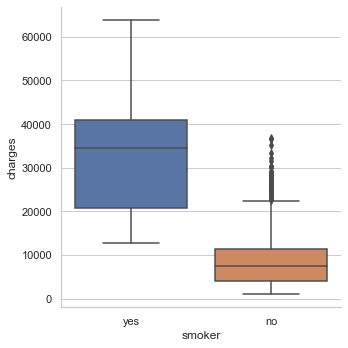

In [34]:
#Box plot to categorical value smoker with respect to charges
sns.catplot(x="smoker", y="charges", kind="box", data=pdata)

# It seems smokers are paying more charges
# Non smoker are paying less, but has lot of outliers 

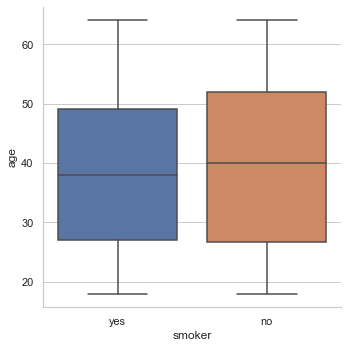

In [35]:
#Box plot to categorical value smoker with respect to age
sns.catplot(x="smoker", y="age", kind="box", data=pdata)

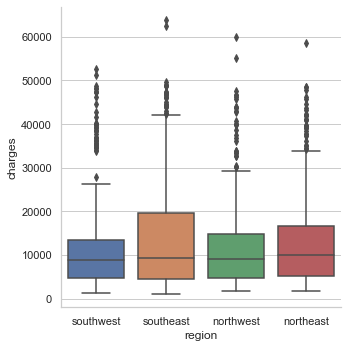

In [36]:
#Box plot to categorical value region with respect to charges
sns.catplot(x="region", y="charges", kind="box", data=pdata)

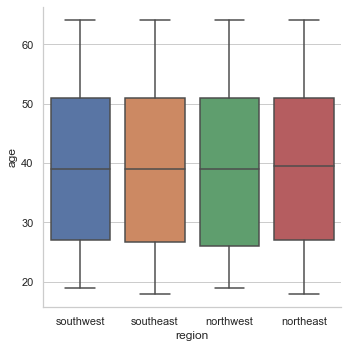

In [37]:
#Box plot to categorical value region with respect to age
sns.catplot(x="region", y="age", kind="box", data=pdata)

In [38]:
pdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


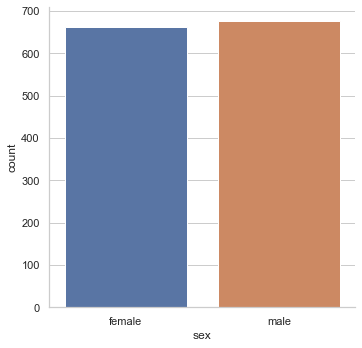

In [39]:
#Count plot for categorical distirbution for sex
sns.catplot(x="sex", kind="count", data= pdata, orient="h")

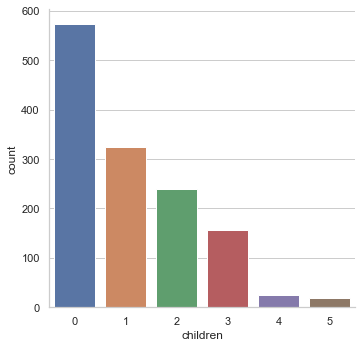

In [40]:
#Count plot for categorical distirbution for children
sns.catplot(x="children", kind="count", data= pdata, orient="h")

#More number with 0 child

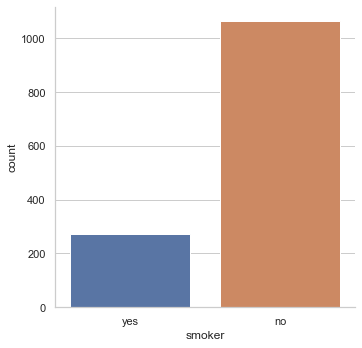

In [41]:
#Count plot for categorical distirbution for smoker
sns.catplot(x="smoker", kind="count", data= pdata, orient="h")

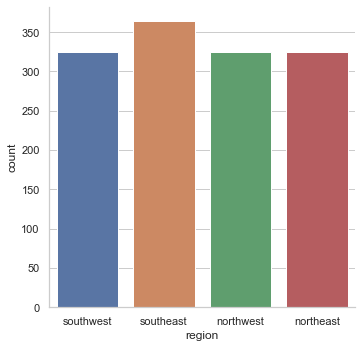

In [42]:
#Count plot for categorical distirbution for region
sns.catplot(x="region", kind="count", data= pdata, orient="h")

# 3i: Pair plot that includes all the columns of the data frame

In [43]:
pdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


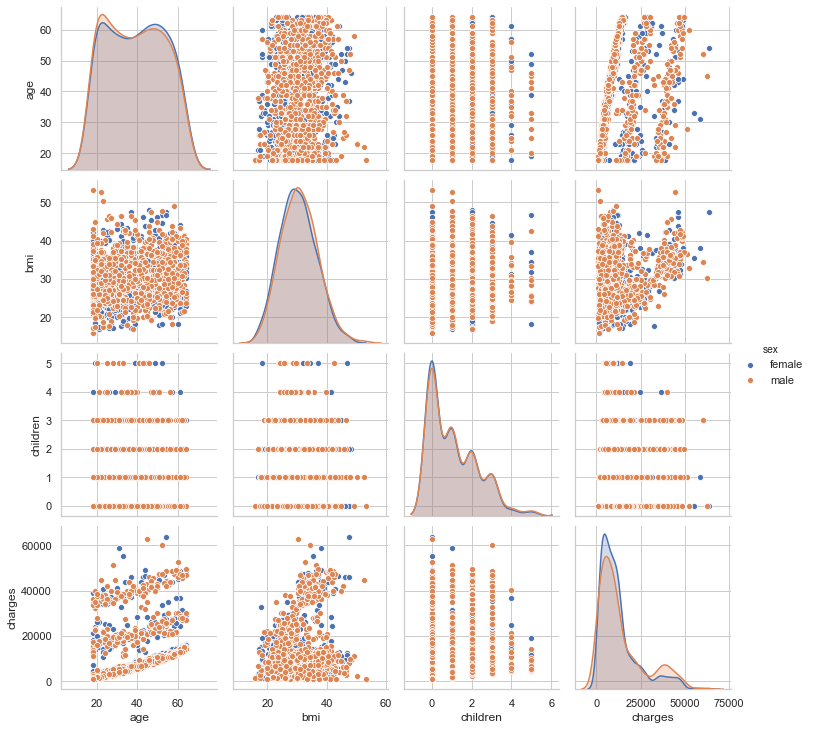

In [44]:
#i Pair plot that includes all the columns of the data frame
sns.pairplot(data= pdata, hue="sex",diag_kind = 'kde')

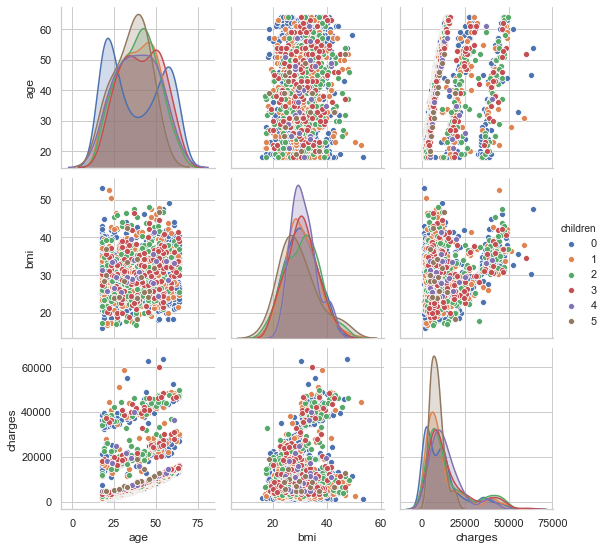

In [45]:
sns.pairplot(data= pdata, hue="children",diag_kind = 'kde')

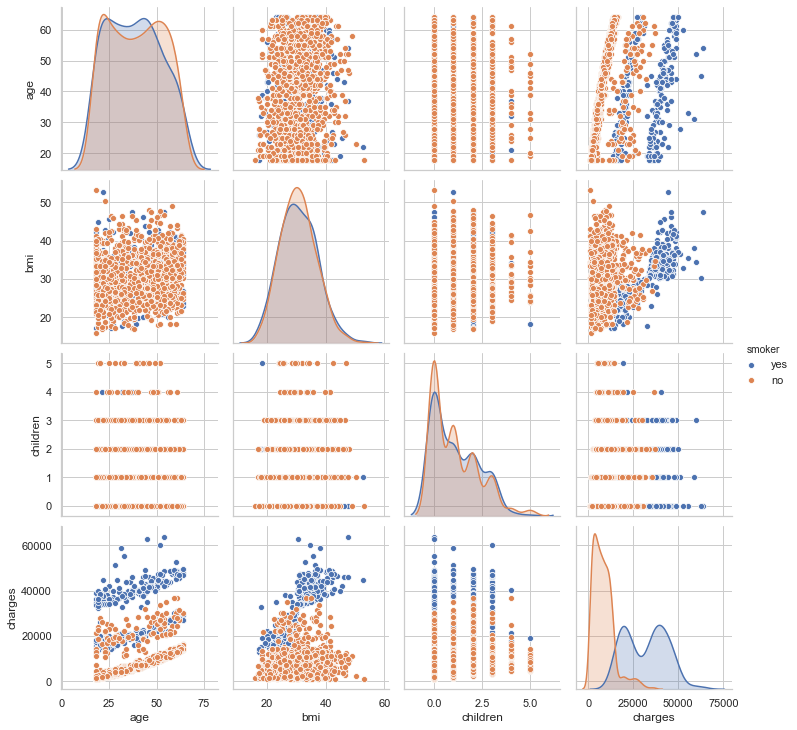

In [46]:
sns.pairplot(data= pdata, hue="smoker",diag_kind = 'kde')

In [47]:
#If you see the pair plot of Age vs charges, it shows higher charges for higher age, also if the person is smoker then 
#even on lower age the charges are more

In [48]:
encoder = LabelEncoder()

pdata_copy = pdata.copy()

pdata_copy["sex"] = encoder.fit_transform(pdata_copy["sex"])
pdata_copy["smoker"] = encoder.fit_transform(pdata_copy["smoker"])
pdata_copy["region"] = encoder.fit_transform(pdata_copy["region"])
pdata_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


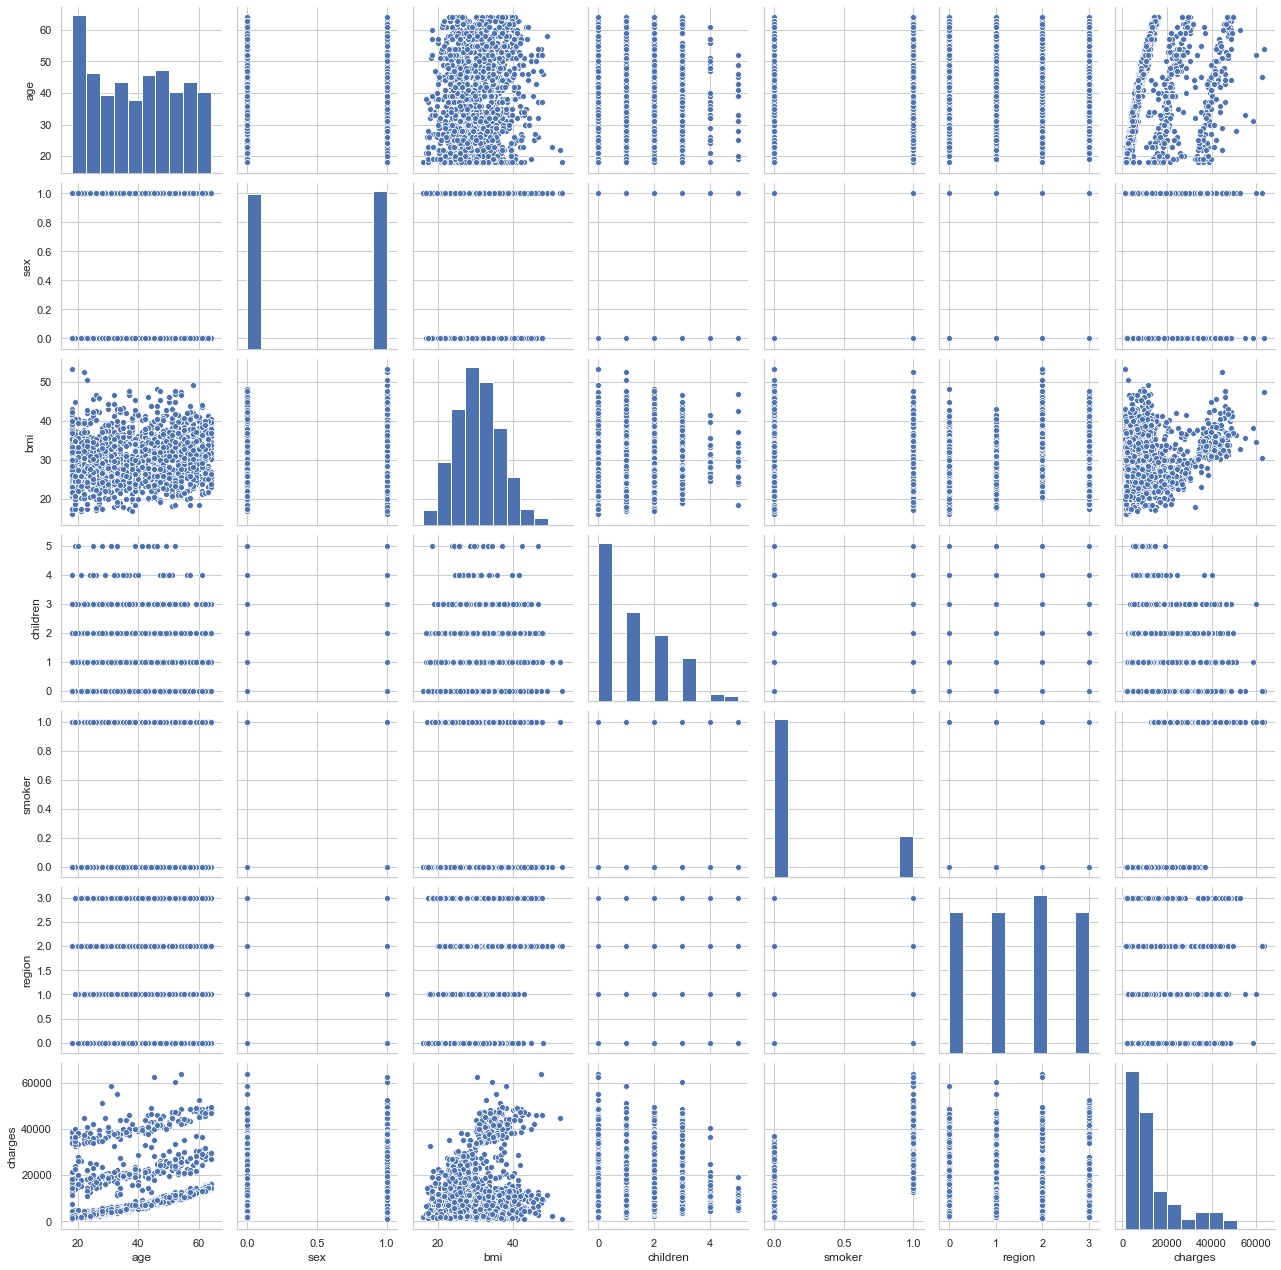

In [49]:
sns.pairplot(data= pdata_copy)

# Statistical Analysis

# 4a: Do charges of people who smoke differ significantly from the people who don't?

In [50]:
pdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
# H0 (Null Hypothesis) => Mean charges of people who smoke = Mean charges of people who don't smoke 
# Ha (Alternate Hypothesis) => Mean charges of people who smoke and non smokers differ significantly 

# We will do 2 sample t test for this with 5% significance level
# If p_value < 0.05 => Reject Null hypothesis

In [52]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind

In [53]:
smokerGroup = pdata[pdata["smoker"] == "yes"]["charges"]
nonsmokerGroup = pdata[pdata["smoker"] == "no"]["charges"]
print("Mean charges for smokers {}".format(smokerGroup.mean()))
print("Mean charges for non smokers {}".format(nonsmokerGroup.mean()))

Mean charges for smokers 32050.23183153285
Mean charges for non smokers 8434.268297856199


In [54]:
# By looking at average of charges for smokers and that of non smokers there seems to be a lot of difference
# we will validate with t statistic and p value

In [55]:
t_statistic, p_value = ttest_ind(smokerGroup, nonsmokerGroup)
print(t_statistic, p_value)

46.664921172723716 8.271435842177219e-283


In [56]:
if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the Mean charges of people who smoke and non smokers differ significantly. aka |We reject the null Hypothesis|')
else:
    print(f'With a p-value of {round(p_value,4)} the Mean charges of people who smoke and non smokers is same. aka |We fail to reject the null Hypothesis|')

With a p-value of 0.0 the Mean charges of people who smoke and non smokers differ significantly. aka |We reject the null Hypothesis|


In [57]:
# t statistic is very large and also p value is very less than our level of significance i.e. 0.05
# So NULL Hypothesis is rejected
# Conclusion: Charges for smokers is significantly large than non smokers

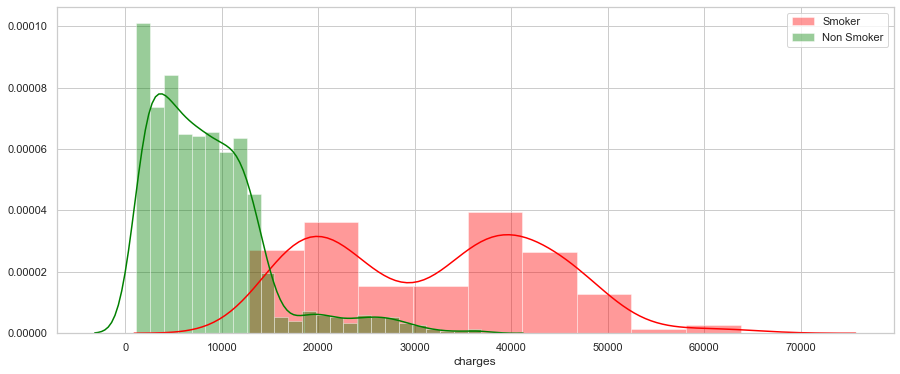

In [58]:
plt.figure(figsize=(15,6))
sns.distplot(smokerGroup, color = 'Red', label = 'Smoker')
sns.distplot(nonsmokerGroup, color = 'Green', label = 'Non Smoker')
plt.legend()
plt.show()

# 4b: Does bmi of males differ significantly from that of females?

In [59]:
pdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
# H0 (Null Hypothesis) => Mean bmi of males = Mean bmi of females 
# Ha (Alternate Hypothesis) => Mean bmi of males and females differ significantly 

# We will do 2 sample t test for this with 5% significance level
# If p_value < 0.05 => Reject Null hypothesis

In [61]:
bmiMaleGroup = pdata[pdata["sex"] == "male"]["bmi"]
bmiFemaleGroup = pdata[pdata["sex"] == "female"]["bmi"]
print("Mean bmi for males {}".format(bmiMaleGroup.mean()))
print("Mean bmi for females {}".format(bmiFemaleGroup.mean()))

Mean bmi for males 30.943128698224832
Mean bmi for females 30.377749244713023


In [62]:
# By looking at average of bmi for males and that of females there is not much difference
# we will validate with t statistic and p value

In [63]:
t_statistic, p_value = ttest_ind(bmiMaleGroup, bmiFemaleGroup)
print(t_statistic, p_value)

1.696752635752224 0.08997637178984932


In [64]:
if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the BMI differs significantly. aka |We reject the null Hypothesis|')
else:
    print(f'With a p-value of {round(p_value,4)} the BMI is same in Male or Female. aka |We fail to reject the null Hypothesis|')

With a p-value of 0.09 the BMI is same in Male or Female. aka |We fail to reject the null Hypothesis|


In [65]:
# t statistic is small and also p value is greater than our level of significance i.e. 0.05
# So we fail to reject NULL hypothesis
# Conclusion: bmi of males and females does not differ significantly

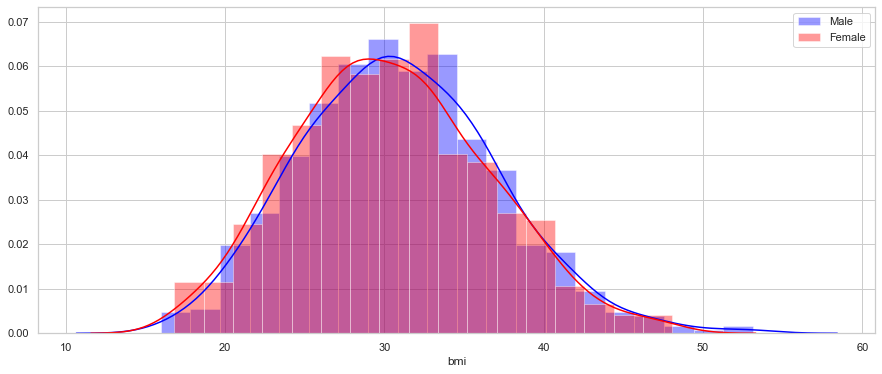

In [66]:
plt.figure(figsize=(15,6))
sns.distplot(bmiMaleGroup, color = 'Blue', label = 'Male')
sns.distplot(bmiFemaleGroup, color = 'Red', label = 'Female')
plt.legend()
plt.show()

# 4c: Is the proportion of smokers significantly different in different genders?

In [67]:
pdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
#To verify proportion test we have to use proportion z test

In [69]:
# Null Hypothesis : proportion of smokers in Male are same as that of Female
# Alternate Hypothesis: proportion of smokers in male and that female differ significantly 

In [70]:
TotalFemaleSmokers = pdata[pdata["sex"]=="female"].smoker.value_counts()[1]
TotalMaleSmokers = pdata[pdata["sex"]=="male"].smoker.value_counts()[1]
TotalMales = pdata.sex.value_counts()["male"]
TotalFemales = pdata.sex.value_counts()["female"]
print("proportion of smoking males is {}% and females {}%".format(round(TotalMaleSmokers/TotalMales,2)*100, round(TotalFemaleSmokers/TotalFemales,2)*100))

proportion of smoking males is 24.0% and females 17.0%


In [71]:
# There are 24% Males smokers and 17% Female smokers
# Whether these numbers are significantly different we can check with proportions z test
# Level of significance = 0.05

In [72]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([TotalFemaleSmokers, TotalMaleSmokers] , [TotalFemales, TotalMales])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the proportion differs significantly. aka |We reject the null Hypothesis|')
else:
    print(f'With a p-value of {round(pval,4)} the proportion of smokers in male and female are same. aka |We fail to reject the null Hypothesis|')

With a p-value of 0.0053 the proportion differs significantly. aka |We reject the null Hypothesis|


# 4d: Is the distribution of bmi across women with no children, one child and two children, the same?

In [73]:
pdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
# To check if the distribution of bmi across women with 0 children, 1 children and 2 children we will do one way ANOVA testing

In [75]:
# Null Hypothesis : For children 0,1 or 2. The distribution of BMI remains same. i.e. No impact on BMI with children count
# Alternate Hypothesis: No. of children does impact the BMI distribution 

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

In [76]:
pfemaleData = pdata[pdata["sex"]=="female"].copy()

bmiWomen0Children = pfemaleData[pfemaleData.children ==0]["bmi"]
bmiWomen1Children = pfemaleData[pfemaleData.children ==1]["bmi"]
bmiWomen2Children = pfemaleData[pfemaleData.children ==2]["bmi"]

In [77]:
print('Count, Mean and standard deviation of BMI for women with 0 children: %3d, %3.2f and %3.2f' % (len(bmiWomen0Children ), bmiWomen0Children.mean(),np.std(bmiWomen0Children ,ddof =1)))
print('Count, Mean and standard deviation of BMI for women with 1 children: %3d, %3.2f and %3.2f' % (len(bmiWomen1Children), bmiWomen1Children.mean(),np.std(bmiWomen1Children,ddof =1)))
print('Count, Mean and standard deviation of BMI for women with 2 children: %3d, %3.2f and %3.2f' % (len(bmiWomen2Children), bmiWomen2Children.mean(),np.std(bmiWomen2Children,ddof =1)))

Count, Mean and standard deviation of BMI for women with 0 children: 289, 30.36 and 5.97
Count, Mean and standard deviation of BMI for women with 1 children: 158, 30.05 and 5.79
Count, Mean and standard deviation of BMI for women with 2 children: 119, 30.65 and 6.63


In [78]:
women_df = pd.DataFrame()

df1            = pd.DataFrame({'Children': 0, 'BMI':bmiWomen0Children})
df2            = pd.DataFrame({'Children': 1, 'BMI':bmiWomen1Children})
df3            = pd.DataFrame({'Children': 2, 'BMI':bmiWomen2Children})

women_df = women_df.append(df1) 
women_df = women_df.append(df2) 
women_df = women_df.append(df3) 

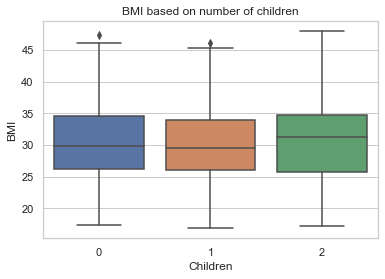

In [79]:
sns.boxplot(x = "Children", y = "BMI", data = women_df)
plt.title('BMI based on number of children')
plt.show()

In [80]:
# The distribution looks similar, median value is also very similar for different children count

In [81]:
# Level of significance = 0.05

In [82]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('BMI ~ C(Children)', data = women_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq     df         F    PR(>F)
C(Children)     24.590123    2.0  0.334472  0.715858
Residual     20695.661583  563.0       NaN       NaN


In [83]:
# Using ANOVA with f_oneway

In [84]:
from scipy.stats import f_oneway

alpha = 0.05
stat, p_value = f_oneway(bmiWomen0Children, bmiWomen1Children, bmiWomen2Children)

if p_value < alpha:
    print(f'With a p-value of {round(p_value,4)} the distribution of BMI is not same. aka |We reject the null Hypothesis|')
else:
    print(f'With a p-value of {round(p_value,4)} the distribution of BMI is same. aka |We fail to reject the null Hypothesis|')

With a p-value of 0.7159 the distribution of BMI is same. aka |We fail to reject the null Hypothesis|


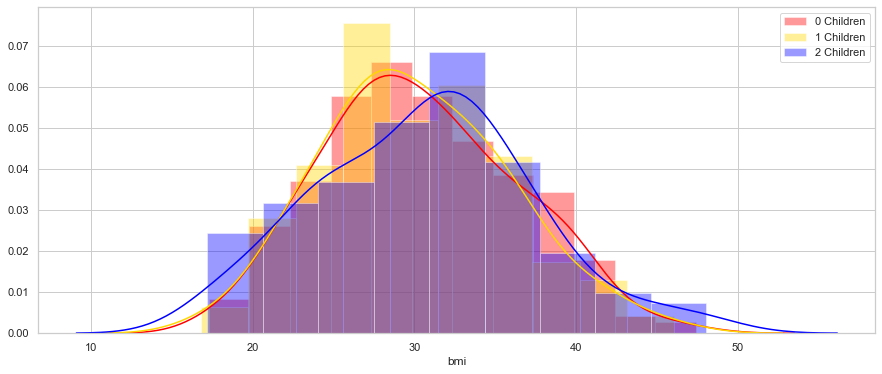

In [85]:
plt.figure(figsize=(15,6))
sns.distplot(bmiWomen0Children, color = 'Red', label = '0 Children')
sns.distplot(bmiWomen1Children, color = 'Gold', label = '1 Children')
sns.distplot(bmiWomen2Children, color = 'blue', label = '2 Children')
plt.legend()
plt.show()